In [1]:
import pdf2image
import numpy as np
import layoutparser as lp
# import torch

In [2]:
model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

AttributeError: module layoutparser has no attribute Detectron2LayoutModel

In [4]:
pdf_file= 'resnet.pdf' # Adjust the filepath of your input image accordingly
img = np.asarray(pdf2image.convert_from_path(pdf_file)[1])

In [5]:
layout = model.detect(img)

/home/tylee/api-server/.venv/lib/python3.10/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


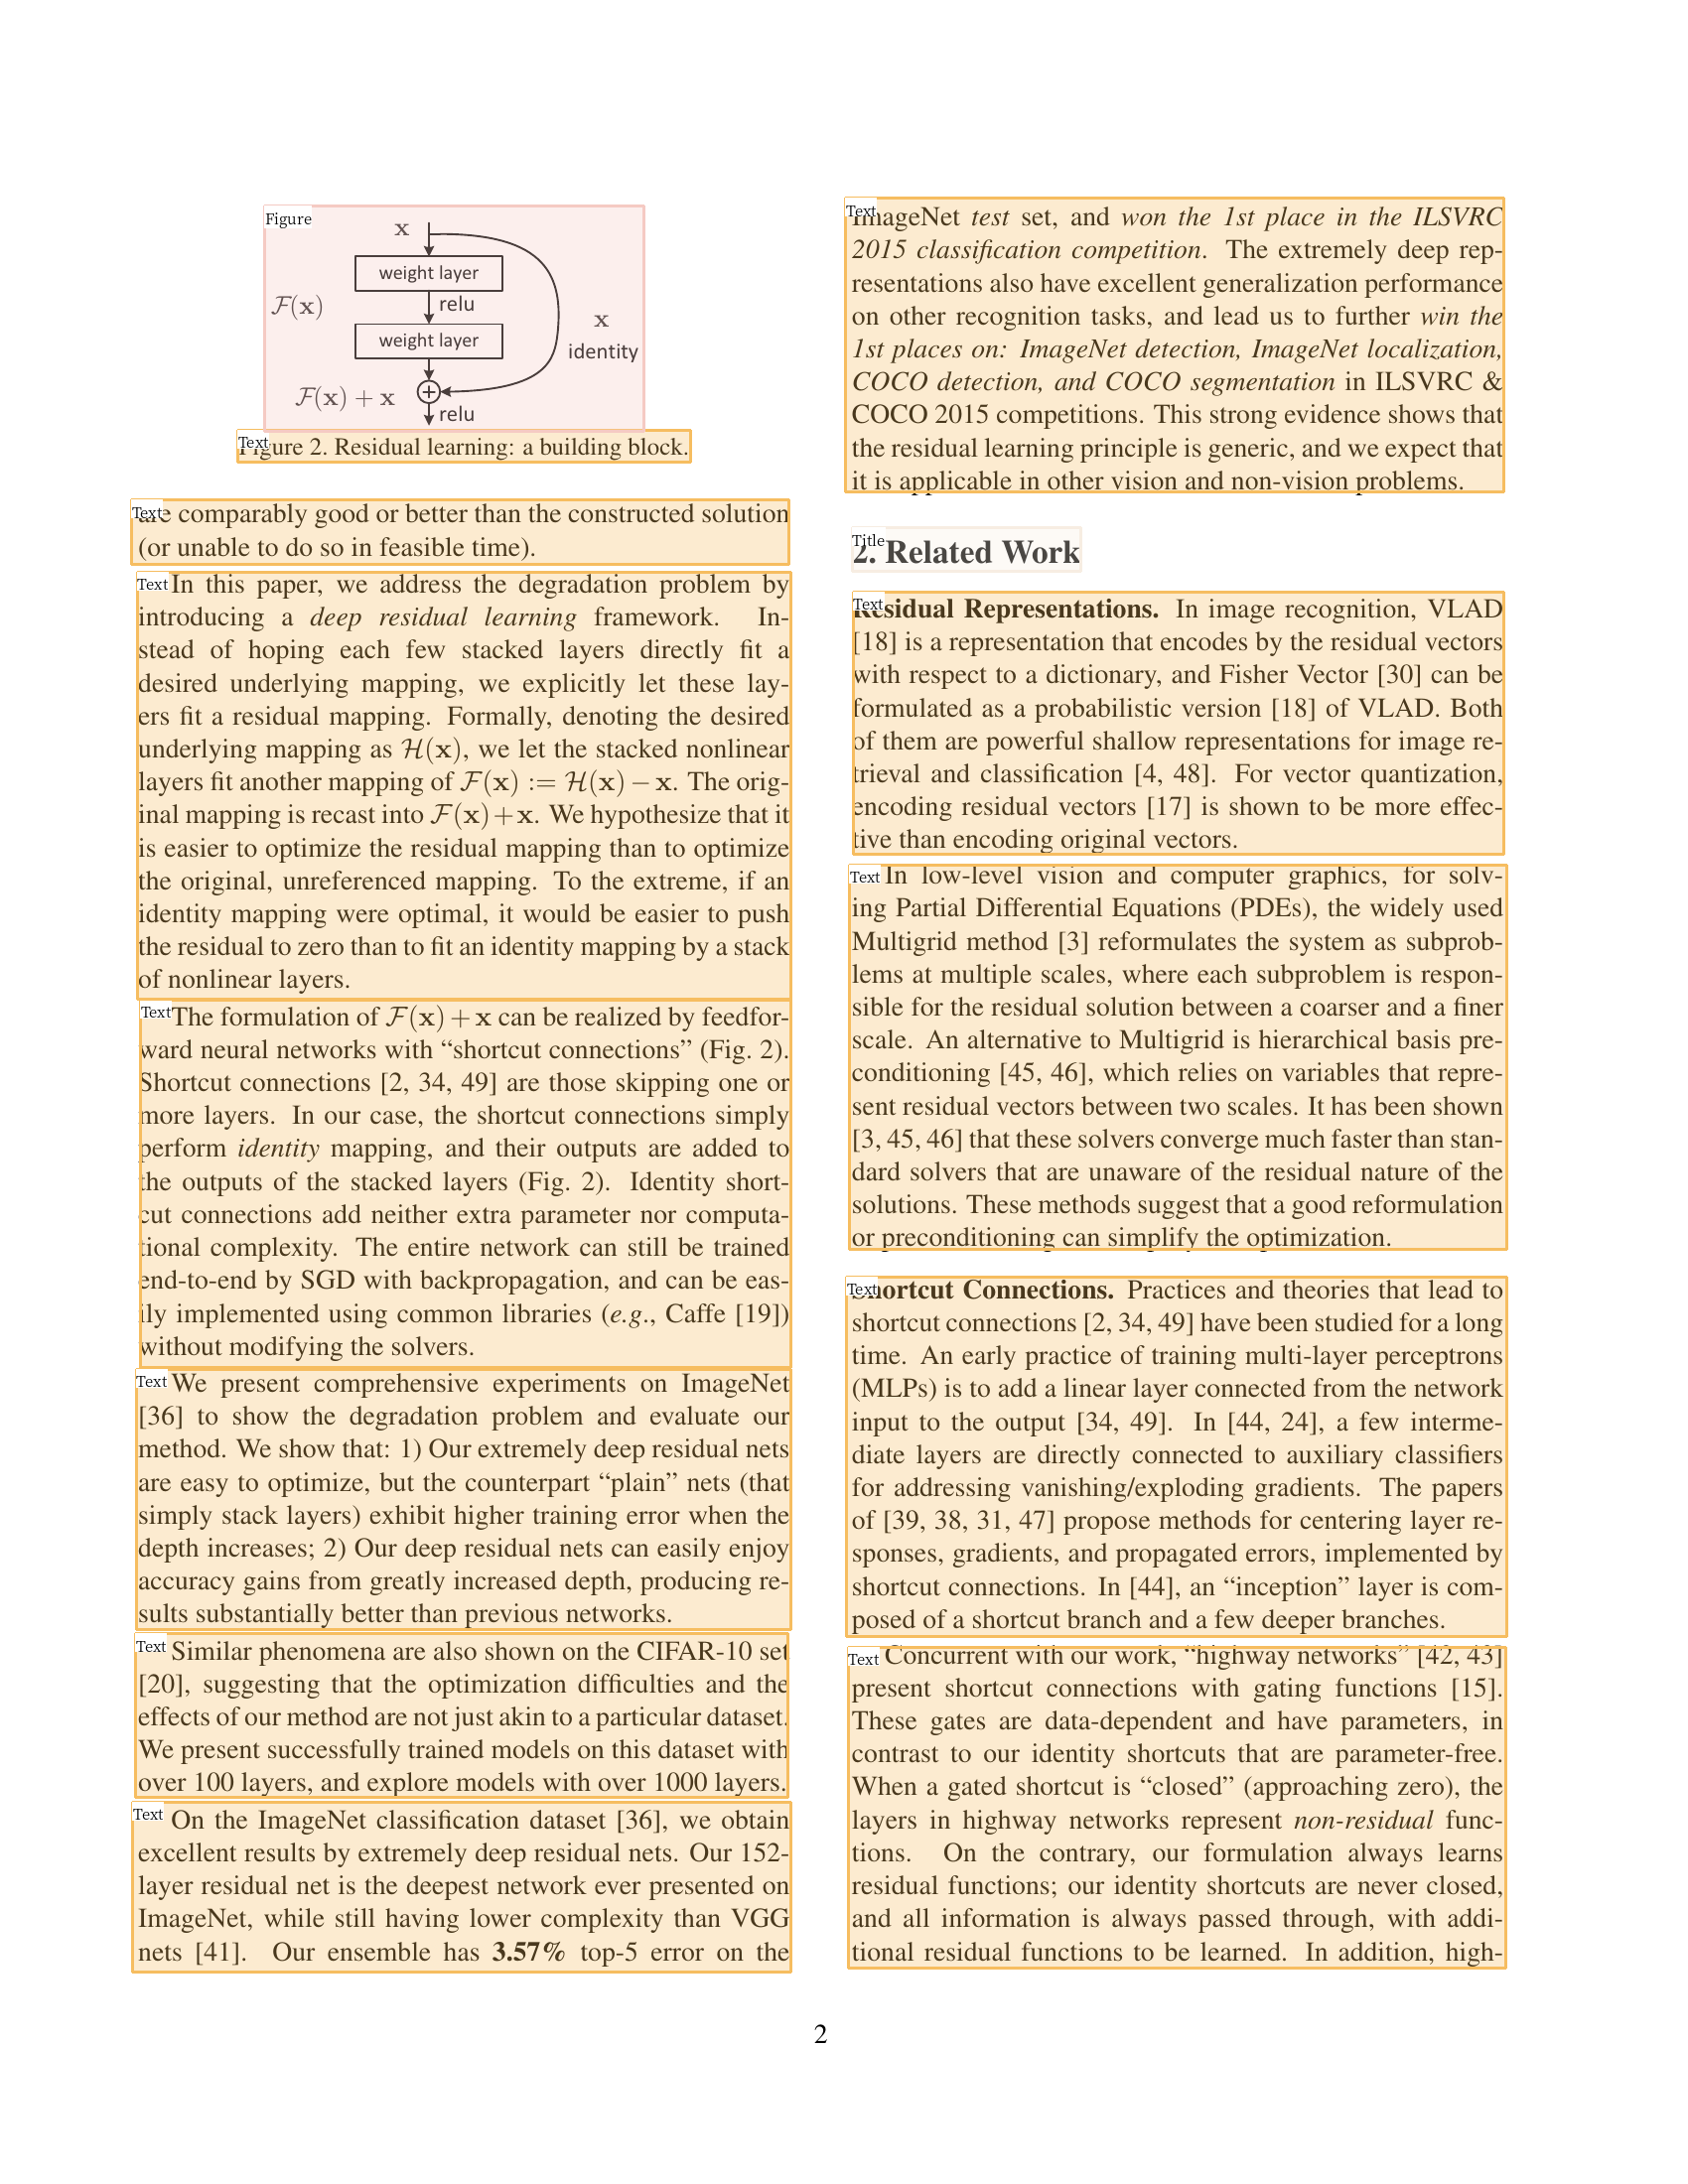

In [6]:
lp.draw_box(img, layout, box_width=3, box_alpha=0.3, show_element_type=True)

In [7]:
text_blocks = lp.Layout([b for b in layout if b.type=='Text'])
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

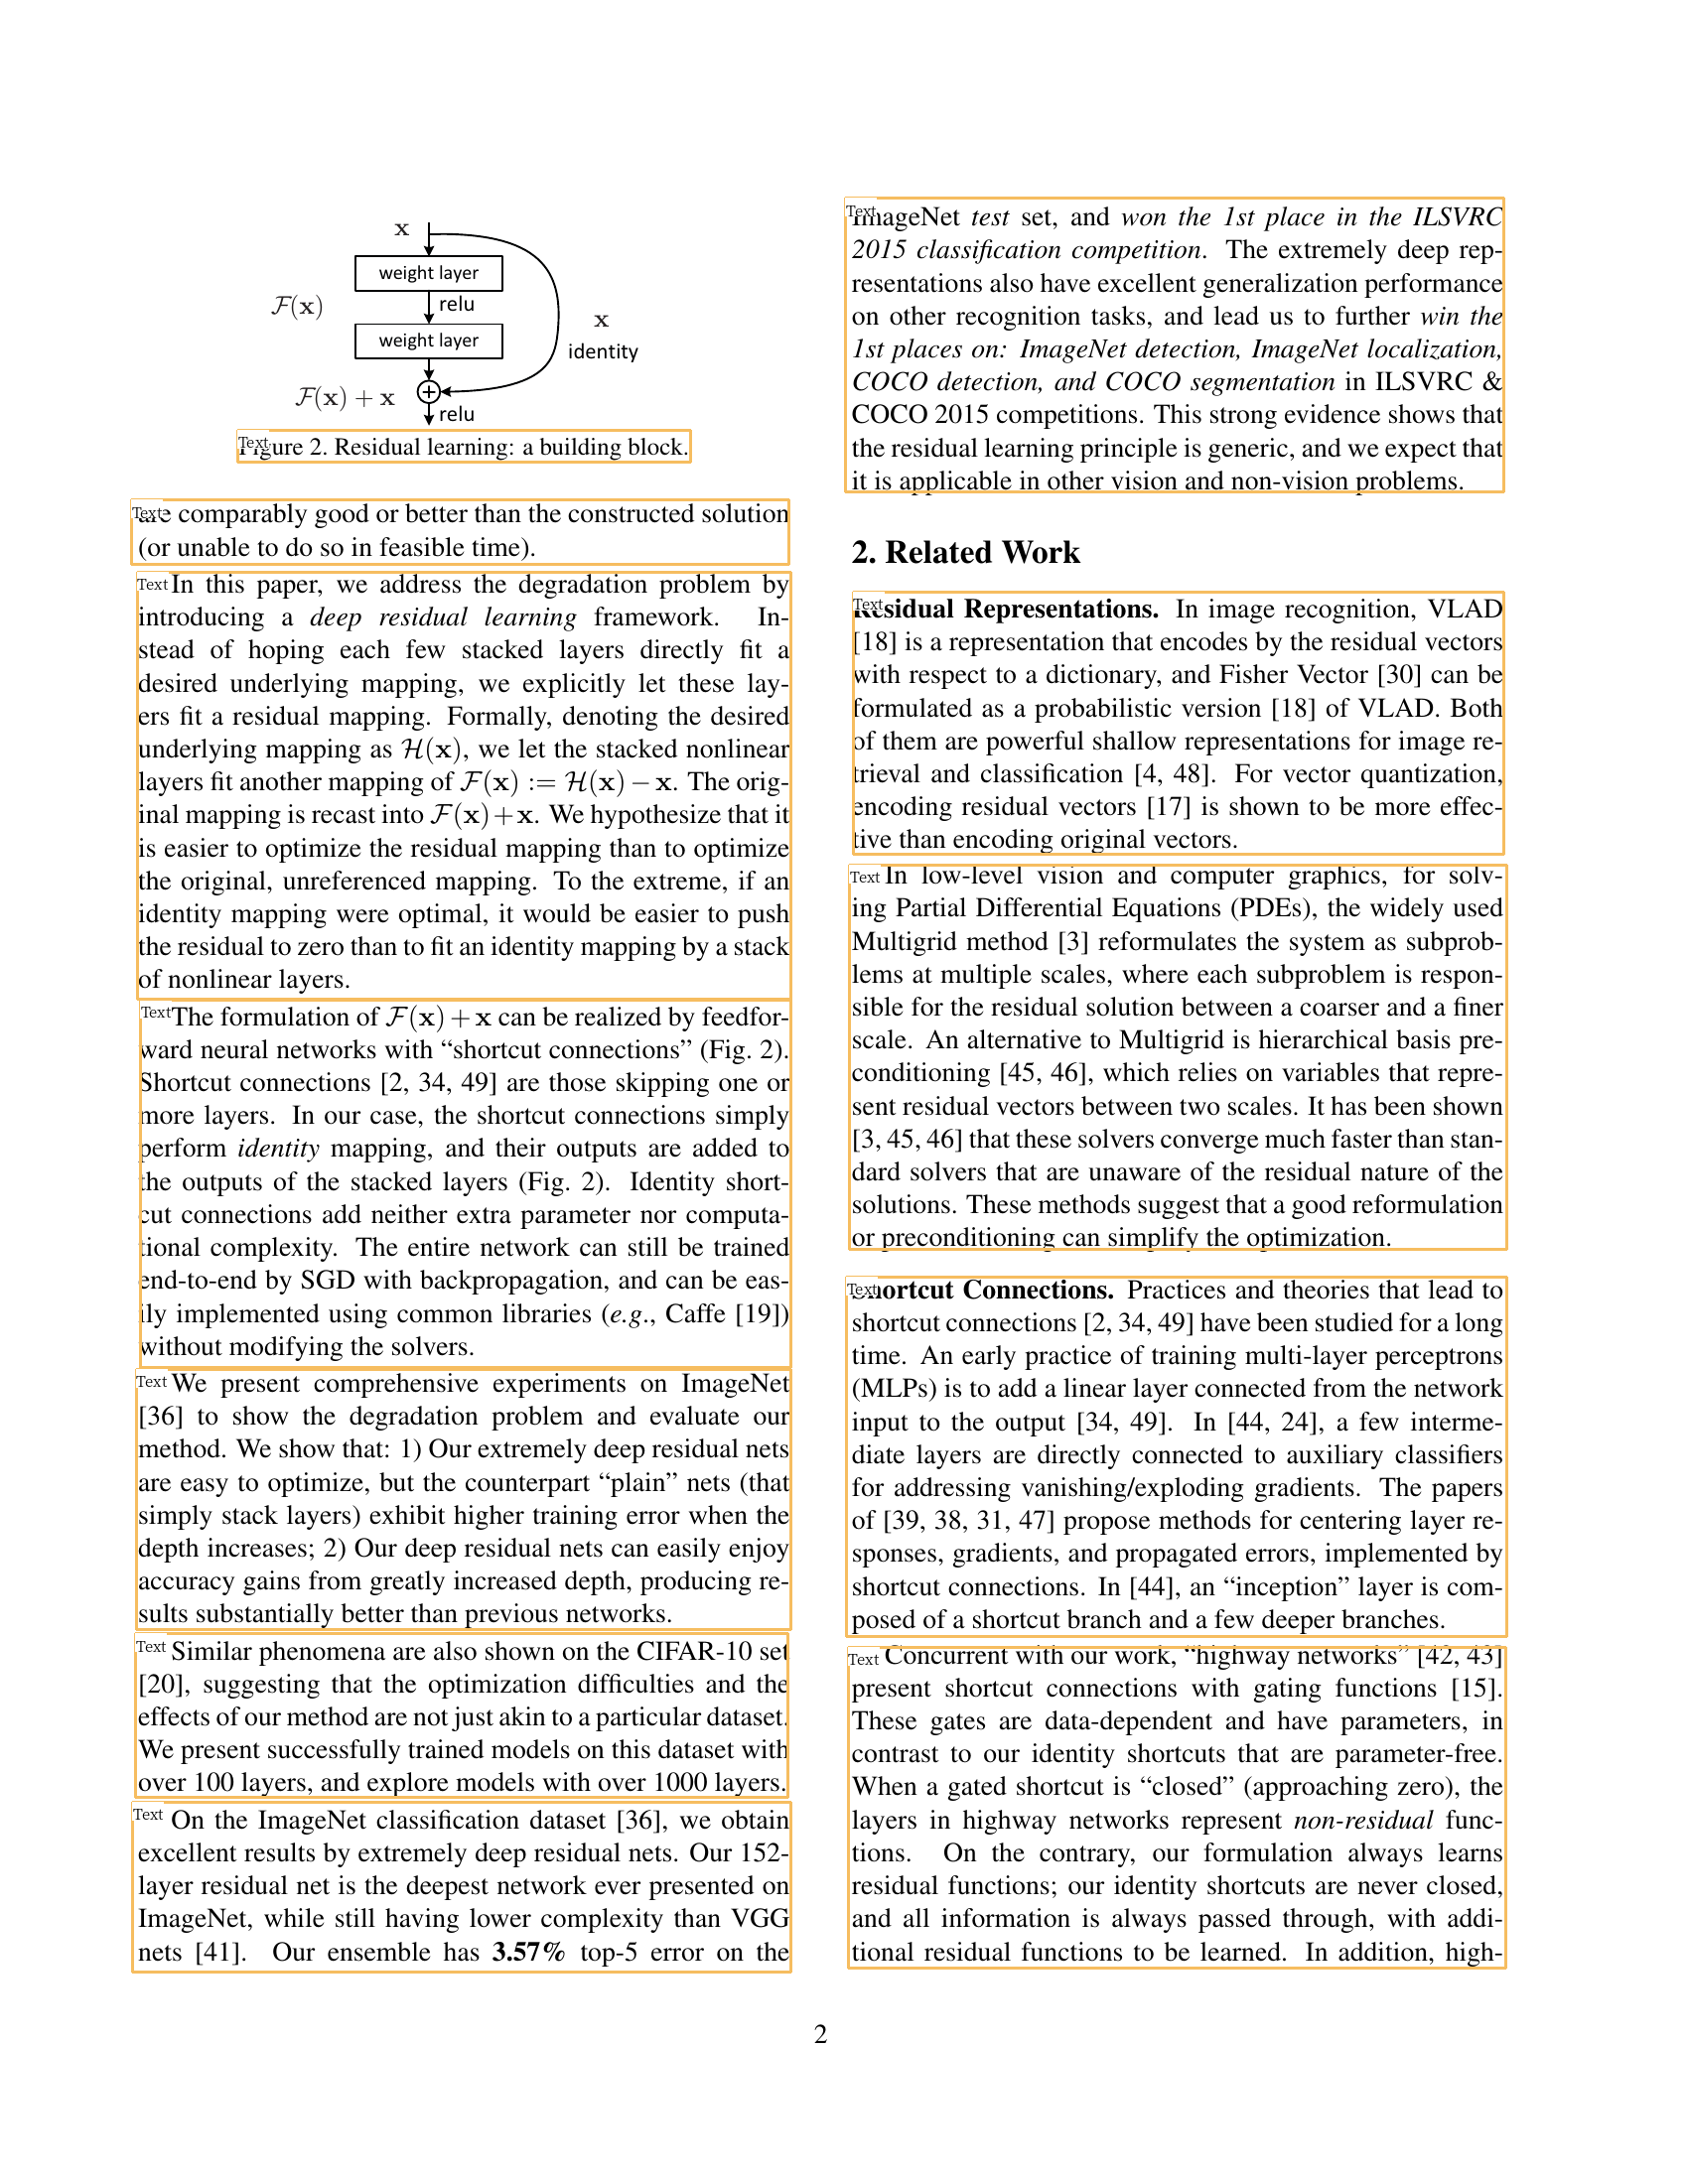

In [8]:
lp.draw_box(img, text_blocks, box_width=3, show_element_type=True)

In [9]:
ocr_agent = lp.TesseractAgent(languages='eng')

In [10]:
for block in text_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(img))
        # add padding in each image segment can help
        # improve robustness

    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [11]:
from deep_translator import GoogleTranslator

In [12]:
gTranslator = GoogleTranslator(source='en', target='ko')

In [13]:
from nltk.tokenize import sent_tokenize

In [14]:
pattern1 = r'\([^)]*\)'
pattern2 = r'\[[^)]*\]'

In [15]:
import re

In [16]:
for txt in text_blocks.get_texts():
    # translated = translate_extracted(txt)
    txt = txt.split('\n')
    txt = ' '.join(txt)
    txt = re.sub(pattern=pattern1, repl='', string= txt)
    txt = re.sub(pattern=pattern2, repl='', string= txt)
    txt = re.sub('- ', '', txt)

    translated = gTranslator.translate(txt)
    print(f'{txt} \n Translated: {translated}', end='\n---\n')

In low-level vision and computer graphics, for solving Partial Differential Equations , the widely used Multigrid method  that these solvers converge much faster than standard solvers that are unaware of the residual nature of the solutions. These methods suggest that a good reformulation or preconditioning can simplify the optimization.  
 Translated: 저수준 비전 및 컴퓨터 그래픽에서 편미분 방정식을 풀기 위해 널리 사용되는 멀티그리드 방법은 이러한 솔버가 솔루션의 잔여 특성을 인식하지 못하는 표준 솔버보다 훨씬 빠르게 수렴합니다. 이러한 방법은 좋은 재구성이나 사전 조정이 최적화를 단순화할 수 있음을 시사합니다.
---
The formulation of F +x can be realized by feedforward neural networks with “shortcut connections” . Shortcut connections  are those skipping one or more layers. In our case, the shortcut connections simply perform identity mapping, and their outputs are added to the outputs of the stacked layers . Identity shortcut connections add neither extra parameter nor computational complexity. The entire network can still be trained end-to-end by SGD with backpropagation, and can be easily impl